In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session()

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,01deg_jra55v13_ryf9091_OFAM3visc,50
1,01deg_jra55v13_ryf9091_tides_fixed,1823
2,01deg_jra55v13_ryf9091_k_smag_iso3,128
3,01deg_jra55v13_ryf9091_5Kv,102
4,1deg_jra55v131_ryf_nonuniform_albedo,260
5,01deg_jra55v13_ryf9091_tides_control,620
6,1deg_jra55v131_ryf_const_albedo,260
7,01deg_jra55v13_ryf9091_tides,2578
8,025deg_jra55_ryf9091_gadi_noGM,316
9,1deg_jra55_iaf_v2.0.0rc3_nonuniform_albedo,4660


In [5]:
cc.querying.get_variables(session, experiment='025deg_jra55_ryf9091_gadi', frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
...,...,...,...,...,...,...,...
159,wt,dia-surface velocity T-points,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
160,xt_ocean,tcell longitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00
161,xu_ocean,ucell longitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00
162,yt_ocean,tcell latitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00


In [6]:
expt = '025deg_jra55_ryf9091_gadi'
variable = 'temp_global_ave'
darray = cc.querying.getvar(expt, variable, session)
darray

,Array,Chunk
Bytes,57.60 kB,8 B
Shape,"(7200, 1)","(1, 1)"
Count,14700 Tasks,7200 Chunks
Type,float64,numpy.ndarray


In [7]:
darray = cc.querying.getvar(expt,variable,session,
                            start_time='2000-01-01',
                            end_time='2050-12-31')
darray

,Array,Chunk
Bytes,5.18 kB,8 B
Shape,"(648, 1)","(1, 1)"
Count,1323 Tasks,648 Chunks
Type,float64,numpy.ndarray


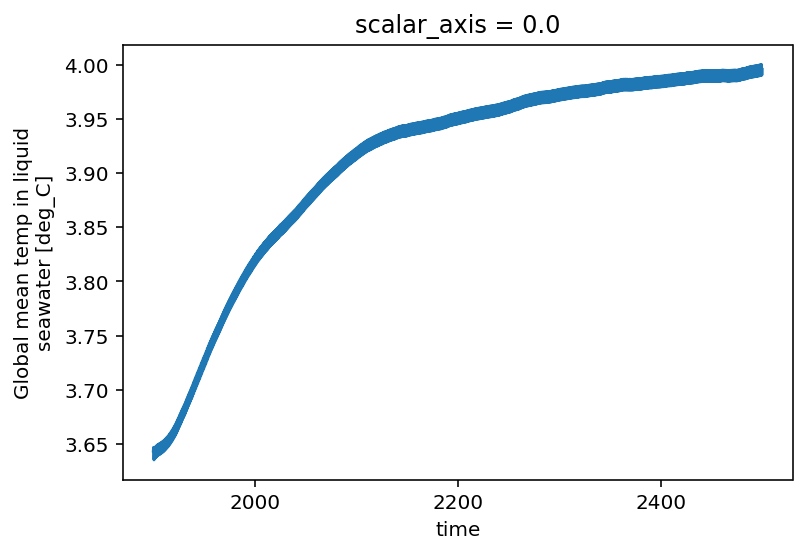

In [8]:
expt = '025deg_jra55_ryf9091_gadi'
variable = 'temp_global_ave'
darray = cc.querying.getvar(expt, variable, session)
darray.plot();

In [10]:
vars_025deg = cc.querying.get_variables(session, experiment='025deg_jra55_ryf9091_gadi')
vars_025deg[vars_025deg['name'].str.lower().str.match('temp')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
1,TEMP,None,None,restart200/ice/monthly_sstsss.nc,12,None,None
113,temp,temp,None,restart200/ocean/ocean_temp_salt.res.nc,12,None,None
248,temp,Conservative temperature,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
249,temp_global_ave,Global mean temp in liquid seawater,1 monthly,output299/ocean/ocean_scalar.nc,300,1900-01-01 00:00:00,2500-01-01 00:00:00
250,temp_surface_ave,Global mass weighted mean surface temp in liqu...,1 monthly,output299/ocean/ocean_scalar.nc,300,1900-01-01 00:00:00,2500-01-01 00:00:00
316,temp,Conservative temperature,1 yearly,output199/ocean/ocean.nc,198,1904-01-01 00:00:00,2300-01-01 00:00:00


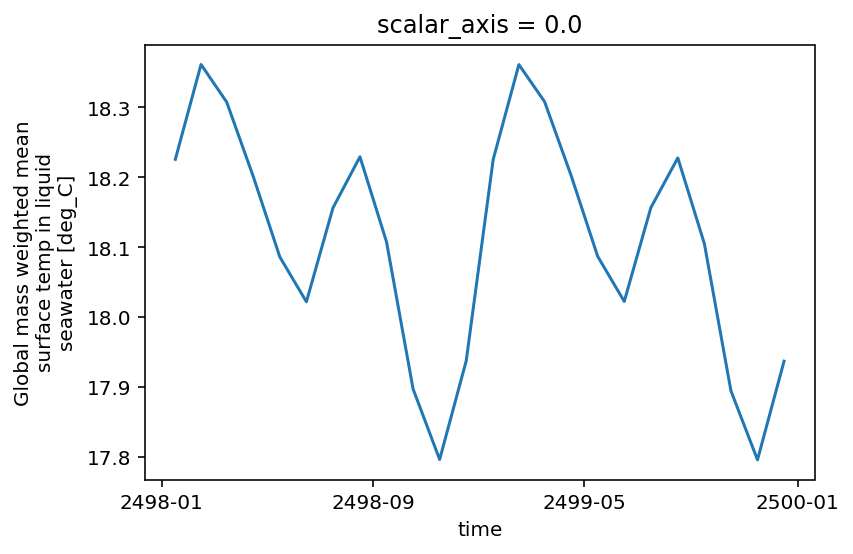

In [13]:
expt = '025deg_jra55_ryf9091_gadi'
variable = 'temp_surface_ave'
darray = cc.querying.getvar(expt, variable, session, n=-1)
darray.plot();